In [46]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
from src.utils import get_wandb_summaries
from src.visualization.visualize import bars_with_labels_and_errors
import numpy as np

%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
runs = [
        # "1szazbm1",
        "19h7xs81",

        "20gczthf",
        # "3g83xe10",
        "1ke6xden",
        # "301fj0y2",
        "1x254xwv",
        "289402rh",
        "2911eip8",
        # "2czots5t",
        "21ebfhh3",
        "23qp4fss",
        "2ix8tob4",
        # "1e5ddrbv",
        "7r8nxjo5",
        "z0nbehr0",
        "2ncle1v9",
        "3ss14njj",
        "1apcb94k", # CNN Models
        "ko9zy18b",
        "2irztt2o",
        "27eeg42m",
        "9kq7490z",
        "eq4g39ub", # More CNN Transformer
        "1g7it1lr"
    ]
    
summaries = get_wandb_summaries(runs)

In [48]:
summaries_df = pd.DataFrame(summaries)
summaries_df["multitask"] = summaries_df["command"].str.contains("pretrained_predict_daily_features.ckpt")

is_multitask = summaries_df[summaries_df["multitask"]]
summaries_df.loc[summaries_df["multitask"],"model"] = is_multitask["model"] + " - Daily Features Multitask"

summaries_df["test/roc_ci"] = list(zip(summaries_df['test/roc_auc_ci_low'], summaries_df['test/roc_auc_ci_high']))

In [49]:
summaries_df

,test_predictions,feature_importance,test/pr_auc_ci_high,test/roc_auc_ci_high,_runtime,_timestamp,train/roc_auc,test/roc_auc,task,_wandb,...,test/best_pr_auc,eval/best_roc_auc,eval/pr_table,eval/loss_step,train/det_table,train/best_roc_auc,eval/pr_auc,test/loss,multitask,test/roc_ci
0,{'artifact_path': 'wandb-client-artifact://4o9...,"{'format': 'png', 'height': 480, 'sha256': 'd3...",0.039844,0.723507,422,1643070408,0.737818,0.707549,PredictSurveyCol-(symptom_severity__q_fatigue_...,{'runtime': 420},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6914617368640869, 0.7235068701632916)"
1,NaN,NaN,0.079628,0.847500,34541,1642483093,0.935254,0.813954,PredictSurveyCol-symptom_severity__fever_q_3 >...,{'runtime': 34582},...,0.055598,0.766820,{'artifact_path': 'wandb-client-artifact://fgf...,0.000691,"{'size': 557155, '_type': 'table-file', 'ncols...",0.935621,0.033269,NaN,True,"(0.7804077863693237, 0.8474999070167542)"
2,{'sha256': '21e52431d0b09d077a912f133db53770d6...,{'sha256': '3ba6598ebb0d4404a8cd05553eb844b7d7...,0.019318,0.774476,404,1643068076,0.806051,0.740792,PredictSurveyCol-symptom_severity__fever_q_3 >...,{'runtime': 403},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.7053255932119042, 0.7744761940195568)"
3,"{'nrows': 130442, 'sha256': '57268ce726ccb38f9...",{'sha256': '407ebf0943224e37df4af6c232b5404711...,0.049433,0.657473,407,1643066915,0.650249,0.647025,PredictSurveyCol-have_flu > 0,{'runtime': 405},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6362778317460756, 0.6574727516954003)"
4,"{'_type': 'table-file', 'ncols': 4, 'nrows': 1...",NaN,0.074592,0.684057,48229,1643220486,0.799689,0.671006,PredictSurveyCol-have_flu > 0,{'runtime': 48238},...,0.066136,0.662902,{'artifact_path': 'wandb-client-artifact://113...,0.020561,{'_latest_artifact_path': 'wandb-client-artifa...,0.799689,0.048581,0.083944,True,"(0.6579557657241821, 0.6840571165084839)"
5,NaN,NaN,0.047973,0.652250,30157,1642021405,0.817021,0.640837,PredictSurveyCol-have_flu > 0,{'runtime': 30199},...,0.042932,0.612130,{'path': 'media/table/eval/pr_table_3624_942de...,0.085456,{'artifact_path': 'wandb-client-artifact://u1p...,0.817021,0.032985,NaN,False,"(0.6294229626655579, 0.6522501707077026)"
6,{'path': 'media/table/test_predictions_14_d5f8...,{'path': 'media/images/feature_importance_12_f...,0.022775,0.722670,412,1643069232,0.728330,0.703520,PredictSurveyCol-symptom_severity__cough_q_3 >...,{'runtime': 410},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6840661389870446, 0.7226702290513877)"
7,NaN,NaN,0.089167,0.775500,29368,1642407513,0.834527,0.759502,PredictSurveyCol-(symptom_severity__q_fatigue_...,{'runtime': 29411},...,0.072978,0.727111,"{'_type': 'table-file', 'ncols': 3, 'nrows': 5...",0.015722,{'artifact_path': 'wandb-client-artifact://16o...,0.834527,0.033523,NaN,True,"(0.7435042858123779, 0.7755002379417419)"
8,NaN,NaN,0.046479,0.730383,31863,1642047551,0.874030,0.712649,PredictSurveyCol-(symptom_severity__q_fatigue_...,{'runtime': 31910},...,0.038365,0.669759,{'path': 'media/table/eval/pr_table_3805_2aa94...,0.051623,{'_latest_artifact_path': 'wandb-client-artifa...,0.874030,0.021388,NaN,False,"(0.6949158310890198, 0.7303827404975891)"
9,{'artifact_path': 'wandb-client-artifact://gys...,"{'format': 'png', 'height': 480, 'sha256': 'bd...",0.011328,0.766294,386,1643065736,0.872147,0.708416,PredictFluPos,{'runtime': 386},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6485623229886598, 0.766294256312942)"


In [50]:
manual_adjustments = {
    "3ss14njj":[("multitask",True),("task","PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0"),
                ("model","CNNToTransformerEncoder - Daily Features Multitask")]
}
for run_id, changes in manual_adjustments.items():
    for k,v in changes:
        summaries_df.loc[summaries_df["id"] == run_id,k] = v



OLD_TASK_NAMES = [ 'PredictFluPos',
                  'PredictSurveyCol-have_flu > 0', 
                 'PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0',
                 'PredictSurveyCol-symptom_severity__fever_q_3 > 0 | symptom_severity__fever_q_2 > 0',
                 'PredictSurveyCol-(symptom_severity__q_fatigue_2 > 0) | (symptom_severity__q_fatigue_3 > 0)']

NEW_TASK_NAMES = [ 'Flu Positivity',
                  'Two or More\nFlu Symptoms',
                  'Severe Cough',
                  'Severe Fever',
                  'Severe Fatigue']

task_name_map = dict(zip(OLD_TASK_NAMES,NEW_TASK_NAMES))
summaries_df["task"] = summaries_df["task"].map(task_name_map)


summaries_df["roc_ci"] = summaries_df["test/roc_auc"] - summaries_df["test/roc_auc_ci_low"]
summaries_df["pr_ci"] =  summaries_df["test/pr_auc_ci_high"] - summaries_df["test/pr_auc"]

In [51]:
summaries_df["roc_ci"] = summaries_df["test/roc_auc"] - summaries_df["test/roc_auc_ci_low"]
summaries_df["pr_ci"] =  summaries_df["test/pr_auc_ci_high"] - summaries_df["test/pr_auc"]

In [52]:

all_categories = pd.MultiIndex.from_product([summaries_df["task"].unique(),summaries_df["model"].unique()], names=('task','model'))
summaries_df = summaries_df.set_index(["task","model"])
summaries_df = summaries_df.reindex(all_categories).reset_index()

In [53]:
summaries_df

,task,model,test_predictions,feature_importance,test/pr_auc_ci_high,test/roc_auc_ci_high,_runtime,_timestamp,train/roc_auc,test/roc_auc,...,eval/pr_table,eval/loss_step,train/det_table,train/best_roc_auc,eval/pr_auc,test/loss,multitask,test/roc_ci,roc_ci,pr_ci
0,Severe Fatigue,XGBoost,{'artifact_path': 'wandb-client-artifact://4o9...,"{'format': 'png', 'height': 480, 'sha256': 'd3...",0.039844,0.723507,422,1643070408,0.737818,0.707549,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6914617368640869, 0.7235068701632916)",0.016087,0.007638
1,Severe Fatigue,CNNToTransformerEncoder - Daily Features Multi...,NaN,NaN,0.089167,0.775500,29368,1642407513,0.834527,0.759502,...,"{'_type': 'table-file', 'ncols': 3, 'nrows': 5...",0.015722,{'artifact_path': 'wandb-client-artifact://16o...,0.834527,0.033523,NaN,True,"(0.7435042858123779, 0.7755002379417419)",0.015998,0.016189
2,Severe Fatigue,CNNToTransformerEncoder,NaN,NaN,0.046479,0.730383,31863,1642047551,0.874030,0.712649,...,{'path': 'media/table/eval/pr_table_3805_2aa94...,0.051623,{'_latest_artifact_path': 'wandb-client-artifa...,0.874030,0.021388,NaN,False,"(0.6949158310890198, 0.7303827404975891)",0.017733,0.008115
3,Severe Fatigue,CNN,{'_latest_artifact_path': 'wandb-client-artifa...,NaN,0.048428,0.724737,86143,1643216868,0.845194,0.699181,...,"{'ncols': 3, 'nrows': 51, 'sha256': '34c35ae5e...",0.043534,{'sha256': 'e04f63ccd09ac86b5481084e876ef816b8...,0.845194,0.018861,0.035663,False,"(0.673625111579895, 0.7247368693351746)",0.025556,0.010825
4,Severe Fever,XGBoost,{'sha256': '21e52431d0b09d077a912f133db53770d6...,{'sha256': '3ba6598ebb0d4404a8cd05553eb844b7d7...,0.019318,0.774476,404,1643068076,0.806051,0.740792,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.7053255932119042, 0.7744761940195568)",0.035466,0.006005
5,Severe Fever,CNNToTransformerEncoder - Daily Features Multi...,NaN,NaN,0.079628,0.847500,34541,1642483093,0.935254,0.813954,...,{'artifact_path': 'wandb-client-artifact://fgf...,0.000691,"{'size': 557155, '_type': 'table-file', 'ncols...",0.935621,0.033269,NaN,True,"(0.7804077863693237, 0.8474999070167542)",0.033546,0.024030
6,Severe Fever,CNNToTransformerEncoder,"{'nrows': 114984, 'sha256': '99b39bec1ebcf6300...",NaN,0.059309,0.834496,39578,1643214802,0.940995,0.789822,...,{'artifact_path': 'wandb-client-artifact://g73...,0.019085,{'sha256': 'f27096edf3000ad129961b84aa33e840cc...,0.940995,0.021451,0.010486,False,"(0.7451478838920593, 0.834496021270752)",0.044674,0.020068
7,Severe Fever,CNN,{'artifact_path': 'wandb-client-artifact://q6o...,NaN,0.074728,0.838363,14528,1643135383,0.852371,0.800785,...,"{'size': 1754, '_type': 'table-file', 'ncols':...",0.013599,{'path': 'media/table/train/det_table_2173_b41...,0.852371,0.005576,0.010131,False,"(0.7632064819335938, 0.8383626937866211)",0.037578,0.027152
8,Two or More\nFlu Symptoms,XGBoost,"{'nrows': 130442, 'sha256': '57268ce726ccb38f9...",{'sha256': '407ebf0943224e37df4af6c232b5404711...,0.049433,0.657473,407,1643066915,0.650249,0.647025,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"(0.6362778317460756, 0.6574727516954003)",0.010747,0.005110
9,Two or More\nFlu Symptoms,CNNToTransformerEncoder - Daily Features Multi...,"{'_type': 'table-file', 'ncols': 4, 'nrows': 1...",NaN,0.074592,0.684057,48229,1643220486,0.799689,0.671006,...,{'artifact_path': 'wandb-client-artifact://113...,0.020561,{'_latest_artifact_path': 'wandb-client-artifa...,0.799689,0.048581,0.083944,True,"(0.6579557657241821, 0.6840571165084839)",0.013051,0.008456


In [54]:
OLD_MODEL_NAMES = ["XGBoost",
               "CNN",
               "CNNToTransformerEncoder",
               "CNNToTransformerEncoder - Daily Features Multitask",
]

NEW_MODEL_NAMES = [
    "XGBoost",
    "CNN",
    "CNN-Transformer",
    "Our Model",
]
model_name_map = dict(zip(OLD_MODEL_NAMES,NEW_MODEL_NAMES))
model_order_map = lambda x: NEW_MODEL_NAMES.index(x)
summaries_df["model_clean"] = summaries_df["model"].map(model_name_map)
summaries_df = summaries_df.sort_values(by="model_clean",key=lambda x: x.map(model_order_map))

In [55]:

metrics = pd.melt(summaries_df, id_vars=["model_clean","task"], value_vars=["test/pr_auc","test/roc_auc"], value_name="metric_val")

pr_cis = pd.melt(summaries_df, id_vars=["model_clean","task"], value_vars=["pr_ci"], value_name="ci")
pr_cis["variable"] = "test/pr_auc"

roc_cis = pd.melt(summaries_df, id_vars=["model_clean","task"], value_vars=["roc_ci"], value_name="ci")
roc_cis["variable"] = "test/roc_auc"
cis = pd.concat([pr_cis,roc_cis])

metrics = pd.merge(metrics,cis)
metrics["variable"] = metrics["variable"].map({"test/roc_auc":"ROC AUC",
                                            "test/pr_auc": "PR AUC"})

/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


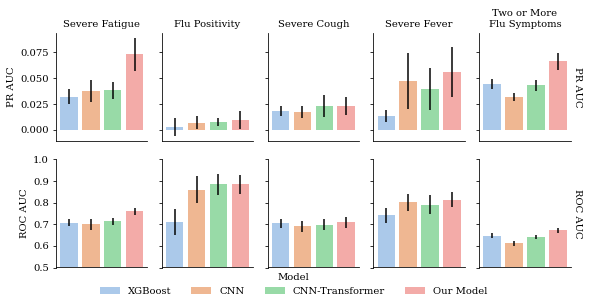

In [57]:
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
def add_error_bars(x,y,errors,**kwargs):
    plt.errorbar(x,y,yerr=errors, color="black")
    
with plt.style.context('/homes/gws/mikeam/seattleflustudy/src/visualization/stylesheets/paper.mplstyle'):
    g = (sns.FacetGrid(metrics, col="task",row="variable", hue= "model_clean", height=2, aspect=0.3, palette="pastel",
                    sharey="row", margin_titles=True)
        .map(sns.barplot,'model_clean','metric_val', order=NEW_MODEL_NAMES)
        .map(add_error_bars,'model_clean','metric_val',"ci")
        .set_titles(col_template="{col_name}", row_template="{row_name}")
        .set_axis_labels("", "")
        .set_xticklabels("")
        .set(xticks=[])
        .add_legend(loc='center',bbox_to_anchor=(.5, 0.0),ncol=len(NEW_MODEL_NAMES),title="Model", shadow=True))

    g.axes[0][0].set_ylabel("PR AUC")
    g.axes[1][0].set_ylabel("ROC AUC")
    [x.set_ylim([0.5,1]) for x in g.axes[1]]
    plt.tight_layout()